In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [11]:
data = pd.read_csv('Pizza-Price.csv')
data

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750
5,F,no,yes,15,yes,900
6,G,yes,no,9,no,600
7,H,yes,no,9,yes,700
8,I,no,yes,15,no,750
9,J,no,yes,15,no,700


In [12]:
data = data.drop('Restaurant', axis=1)

In [13]:
data = pd.get_dummies(data, columns=['Extra Cheeze', 'Extra Mushroom', 'Extra Spicy'], drop_first=True)

In [14]:
X = data.drop('Price', axis=1)
y = data['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
test_predictions = model.predict(X_test)

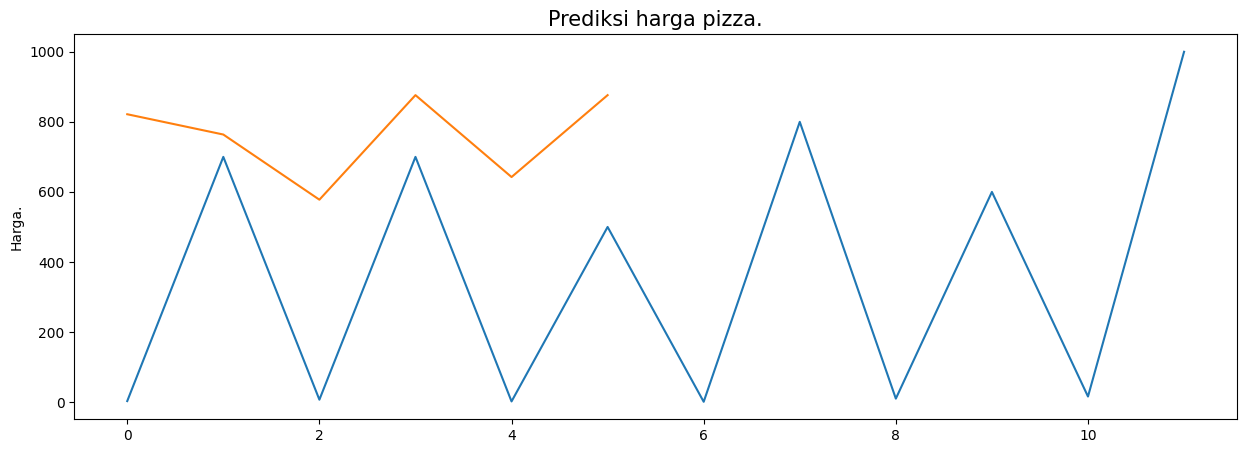

ValueError: Found input variables with inconsistent numbers of samples: [12, 6]

In [26]:
# Plot the predictions
plt.figure(figsize=(15, 5))
plt.plot(y_test.values.flatten())  # Convert y_test to a 1D array
plt.plot(test_predictions.iloc[:, 0])  # Select the first column of test_predictions
plt.title('Prediksi harga pizza.', fontsize=15)
plt.ylabel('Harga.')
plt.show()

# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test.values.flatten(), test_predictions.iloc[:, 0]))
print('MSE:', metrics.mean_squared_error(y_test.values.flatten(), test_predictions.iloc[:, 0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test.values.flatten(), test_predictions.iloc[:, 0])))

# Check the sizes of the arrays
print('y_test size:', len(y_test.values.flatten()))
print('test_predictions size:', len(test_predictions.iloc[:, 0]))



In [18]:
y_test = y_test.reset_index()
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0
0,821.715417
1,763.799512
2,577.827544
3,876.243144
4,642.477148
5,876.243144


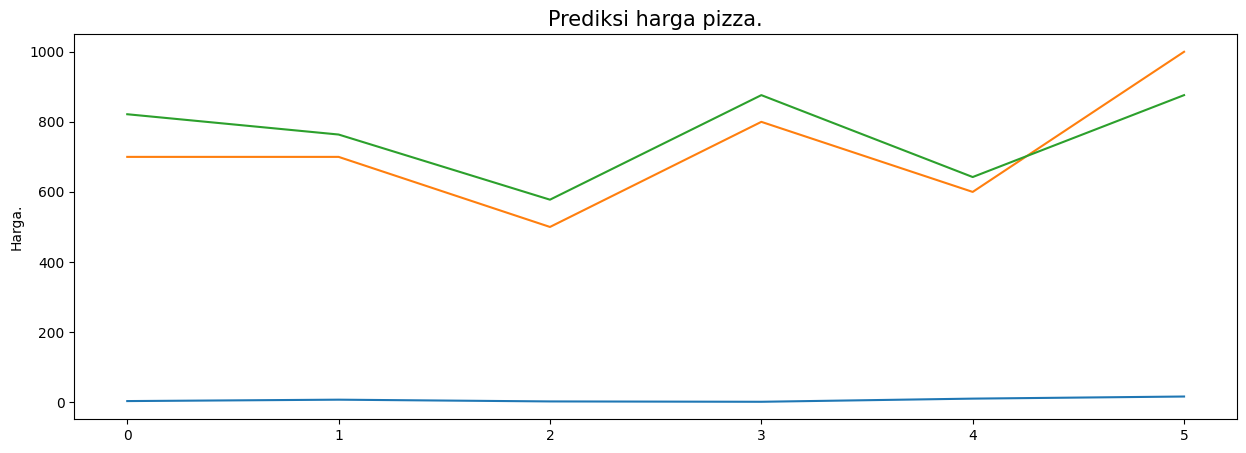

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_test)
plt.plot(test_predictions)
plt.title('Prediksi harga pizza.', fontsize=15)
plt.ylabel('Harga.')
plt.show()


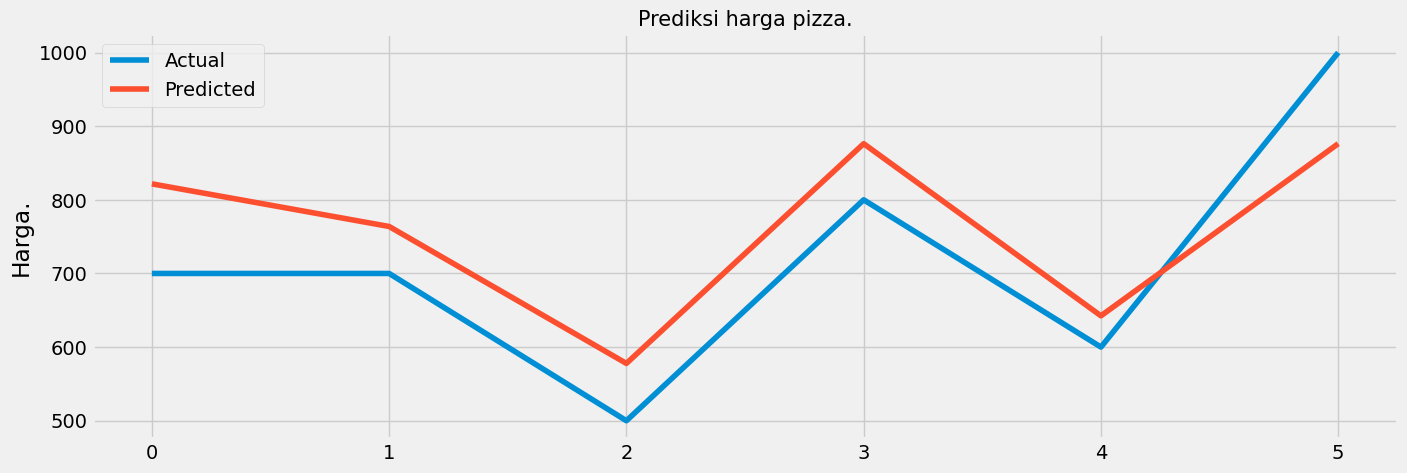

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(y_test['Price'].values, label='Actual')  # Assuming 'Price' is the name of the target column
plt.plot(test_predictions.iloc[:, 0], label='Predicted')  # Select the first column of test_predictions
plt.title('Prediksi harga pizza.', fontsize=15)
plt.ylabel('Harga.')
plt.legend()
plt.show()


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test['Price'].values, test_predictions.iloc[:, 0]))
print('MSE:', metrics.mean_squared_error(y_test['Price'].values, test_predictions.iloc[:, 0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['Price'].values, test_predictions.iloc[:, 0])))


MAE: 84.3032703635994
MSE: 7979.205291656032
RMSE: 89.32639750743355


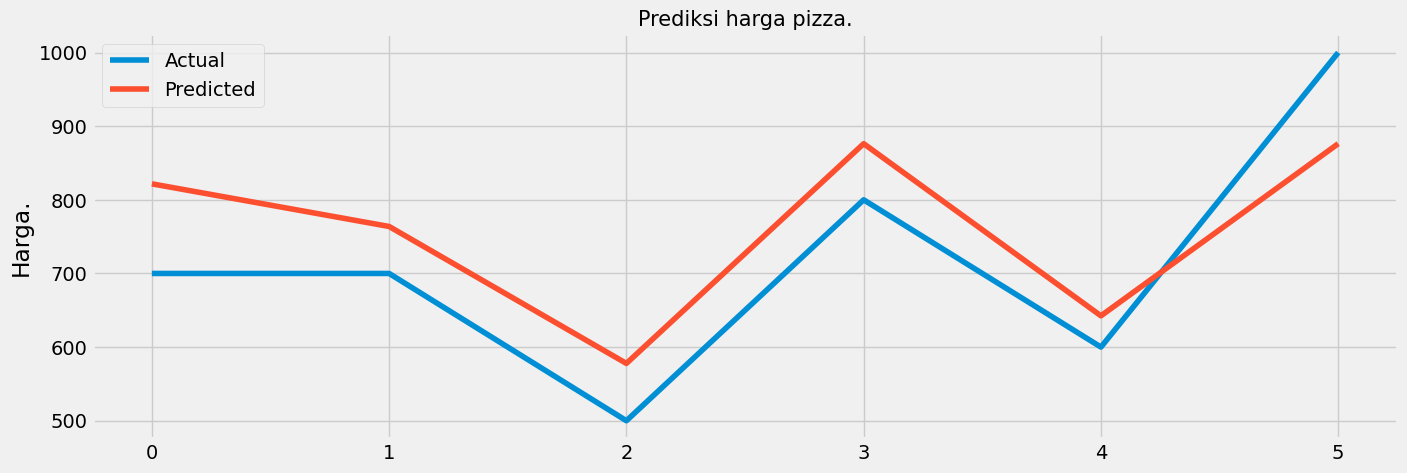

MAE: 84.3032703635994
MSE: 7979.205291656032
RMSE: 89.32639750743355
y_test size: 6
test_predictions size: 6


In [31]:
# ... (previous code)

# Plot the predictions
plt.figure(figsize=(15, 5))
plt.plot(y_test['Price'].values, label='Actual')  # Assuming 'Price' is the name of the target column
plt.plot(test_predictions.iloc[:, 0], label='Predicted')  # Select the first column of test_predictions
plt.title('Prediksi harga pizza.', fontsize=15)
plt.ylabel('Harga.')
plt.legend()
plt.show()

# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test['Price'].values, test_predictions.iloc[:, 0]))
print('MSE:', metrics.mean_squared_error(y_test['Price'].values, test_predictions.iloc[:, 0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test['Price'].values, test_predictions.iloc[:, 0])))

# Check the sizes of the arrays
print('y_test size:', len(y_test['Price'].values))
print('test_predictions size:', len(test_predictions.iloc[:, 0]))


In [32]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

ModuleNotFoundError: No module named 'statsmodels'

In [38]:
matplotlib.rcParams['text.color'] = 'k'

NameError: name 'matplotlib' is not defined

In [39]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

ModuleNotFoundError: No module named 'statsmodels'